In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
def load_tic_toe_data(data_path='./data/tic-tac-toe/tic-tac-toe.data'):
    return pd.read_csv(data_path)

In [3]:
tic_tac_toe_data = load_tic_toe_data()
for col_name in tic_tac_toe_data.columns:
#     print(tic_tac_toe_data[col_name].dtype)
    if(tic_tac_toe_data[col_name].dtype == 'object'):
        tic_tac_toe_data[col_name]= tic_tac_toe_data[col_name].astype('category')
        tic_tac_toe_data[col_name] = tic_tac_toe_data[col_name].cat.codes
tic_tac_toe_data.describe()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,1.221526,1.132706,1.221526,1.132706,1.311390,1.133751,1.221526,1.133751,1.222571,0.653083
std,0.775566,0.798892,0.775566,0.798892,0.741201,0.799372,0.775566,0.799372,0.775941,0.476238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [4]:
X = tic_tac_toe_data.iloc[:, np.r_[0:9]]
y = tic_tac_toe_data.iloc[:, np.r_[9:10]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [8]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, random_state=42)
clf.fit(X_train, y_train)

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                   random_state=42)

In [9]:
cross_val_score(clf, X_train, y_train, cv=5)

C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yasse\miniconda3\envs\cs7641\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

array([0.80620155, 0.7890625 , 0.828125  , 0.8515625 , 0.84375   ])

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
mnist_X, mnist_y = mnist["data"], mnist["target"].astype(np.uint8)
print(mnist_X.shape, mnist_y.shape)

(70000, 784) (70000,)


In [12]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, test_size=.33, random_state=42)
mnist_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, random_state=42)
mnist_clf.fit(mnist_X_train, mnist_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                   random_state=42)

In [13]:
cross_val_score(mnist_clf, mnist_X_train, mnist_y_train, cv=3)

array([0.8585135 , 0.84481545, 0.85479435])

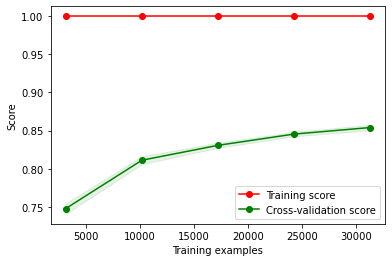

In [14]:
train_sizes, train_scores, test_scores = learning_curve(mnist_clf, mnist_X_train, mnist_y_train, cv=3, random_state=42)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

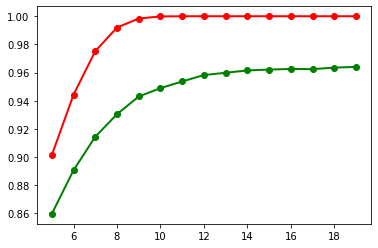

In [20]:
lw = 2
max_depth_range = range(5,20, 1)
train_scores, test_scores = validation_curve(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42), mnist_X_train, mnist_y_train, param_name="base_estimator__max_depth", param_range=max_depth_range, scoring="accuracy", cv=3, n_jobs=6)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)

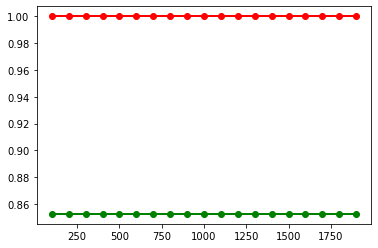

In [16]:
plt.figure()
plt.plot(max_depth_range, train_scores_mean, 'o-', label="Training score", color="r", lw=lw)
plt.plot(max_depth_range, test_scores_mean, 'o-', label="Cross-validation score", color="g", lw=lw)